# MNIST data set i neuronske mreže


Primer korišćenja neuronske mreže u prepoznavanju rukom pisanih cifara.

In [3]:
from sklearn.datasets import fetch_mldata
import numpy as np

mnist = fetch_mldata('MNIST original')

data   = mnist.data / 255.0
labels = mnist.target.astype('int')

Osnovni data set podelićemo na dva podskupa: jedan za trening i jedan za test.


In [4]:
train_rank = 5000
test_rank = 100
#------- MNIST subset --------------------------
train_subset = np.random.choice(data.shape[0], train_rank)
test_subset = np.random.choice(data.shape[0], test_rank)

# train dataset
train_data = data[train_subset]
train_labels = labels[train_subset]

# test dataset
test_data = data[test_subset]
test_labels = labels[test_subset]


Labele su u formatu koji nije pogodan za obučavanje u slučaju da neuronska mreža ima 10 izlaza. Pogodan format je u obliku u kojem je labela vektor od 10 elemenata gde su svi elementi 0 sem elementa koji se nalazi na poziciji labele.

Npr. 
~~~~
      0  1  2  3  4  5  6  7  8  9
3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
~~~~

In [5]:
def to_categorical(labels, n):
    retVal = np.zeros((len(labels), n), dtype='int')
    ll = np.array(list(enumerate(labels)))
    retVal[ll[:,0],ll[:,1]] = 1
    return retVal

test = [3, 5, 9]
print to_categorical(test, 10)

[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


Konverzija train i test labela u pogodan oblik.

In [6]:
# train and test to categorical
train_out = to_categorical(train_labels, 10)
test_out = to_categorical(test_labels, 10)

In [9]:
#--------------- ANN ------------------
from keras.models import Sequential
from keras.layers.core import Activation, Dense
from keras.optimizers import SGD

Neuronska mreža koju ćemo koristiti za prepoznavanje rukom pisane cifre treba da ima 28x28 = 784 ulazna neurona i 10 izlaznih neurona. Broj neurona u skrivenom/im slojevima se može menjati.

In [10]:
# prepare model
model = Sequential()
model.add(Dense(70, input_dim=784))
model.add(Activation('relu'))
#model.add(Dense(50))
#model.add(Activation('tanh'))
model.add(Dense(10))
model.add(Activation('relu'))

Za obučavanje ovako modelovane neuronske mreže koristićemo SGD algoritam za optimizaciju.

In [11]:
# compile model with optimizer
sgd = SGD(lr=0.1, decay=0.001, momentum=0.7)
model.compile(loss='mean_squared_error', optimizer=sgd)

### Obučavanje na osnovu train skupa

In [12]:
# training
training = model.fit(train_data, train_out, nb_epoch=500, batch_size=400, verbose=0)
print training.history['loss'][-1]

0.0189804209024


### Verifikacija na test skupu.

In [19]:
# evaluate on test data
scores = model.evaluate(test_data, test_out, verbose=1)
print 'test', scores

100/100 [==============================] - 0s
test 0.0154698546976


### Verifikacija na obučavajućem skupu

In [20]:
# evaluate on train data
scores = model.evaluate(train_data, train_out, verbose=1)
print 'train', scores

5000/5000 [==============================] - 0s     
train 0.0086535033077


### Korišćenje neuronske mreže u prepoznavanju

(784L,)


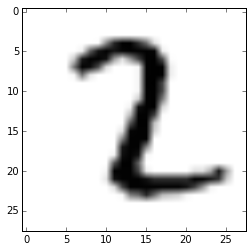

In [38]:
imgN = 2
img = test_data[imgN]
print img.shape
img = img.reshape(28,28)

plt.imshow(img, cmap="Greys")

In [62]:
t = model.predict(test_data, verbose=1)
print t[imgN]

(100L, 784L)
100/100 [==============================] - 0s
[  2.23517418e-08   2.95211256e-01   9.24468756e-01   6.86481223e-02
  -2.23517418e-08   3.72529030e-09  -7.45058060e-09  -3.72529030e-09
  -3.72529030e-09   0.00000000e+00]


<Container object of 10 artists>

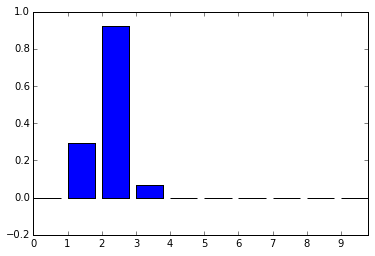

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.xticks(x)
width = 1/1.5
plt.bar(x, t[imgN], color="blue")

Neuron koji je najviše pobuđen određuje predikciju.

In [45]:
rez_t = t.argmax(axis=1)
print rez_t[imgN]

2


Tačnost na test skupu

In [46]:
print sum((test_labels.T == rez_t.T)*1)

93


Korišćenje u realnim uslovima

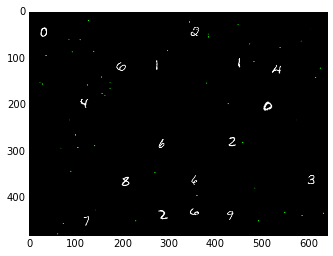

In [94]:
from skimage.io import imread
img = imread('images/img-97.png')
plt.imshow(img)
plt.show()
(h,w, c) = img.shape

Prozor 28x28

In [125]:
blok_size = (28,28)
blok_center = (46, 29)
blok_loc = (blok_center[0]-blok_size[0]/2, blok_center[1]-blok_size[1]/2)

imgB = img[blok_loc[0]:blok_loc[0]+blok_size[0], 
           blok_loc[1]:blok_loc[1]+blok_size[1], 0]

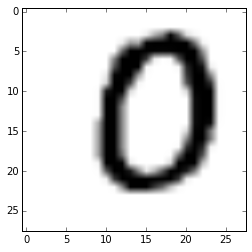

In [126]:
plt.imshow(imgB, cmap="Greys")
(h,w) = imgB.shape

In [127]:
imgB_test = imgB.reshape(784)
print imgB_test

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  36 108 147 249 183  59  18   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 123
 114 249 254 254 254 254 254 159  25   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   2 169 254 254 254 251 249 250 254 254 254
 129   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 146
 254 254 254 207  37   0   9 184 254 254 189   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 190 254 254 254  21   0   0   0  16
 219 254 238  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  40 248 254 254 126   3   0   0   0   0 207 254 25

In [128]:
imgB_test = imgB_test/255.
print imgB_test.shape
tt = model.predict(np.array([imgB_test]), verbose=1)
print tt[0]

(784L,)
1/1 [==============================] - 0s
[  6.84777558e-01  -9.77888703e-09   0.00000000e+00  -4.65661287e-09
  -2.23517418e-08  -1.11758709e-08   4.59195793e-01  -3.72529030e-09
  -3.72529030e-09   0.00000000e+00]


<Container object of 10 artists>

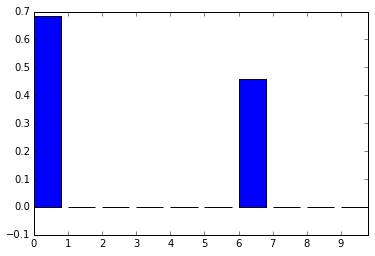

In [129]:
plt.xticks(x)
plt.bar(x, tt[0], color="blue")


In [130]:
blok_center = (46, 31)
blok_loc = (blok_center[0]-blok_size[0]/2, blok_center[1]-blok_size[1]/2)

imgB = img[blok_loc[0]:blok_loc[0]+blok_size[0], 
           blok_loc[1]:blok_loc[1]+blok_size[1], 0]

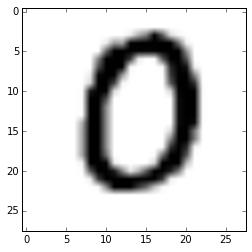

In [131]:
imgB_test = imgB.reshape(784)
plt.imshow(imgB, cmap="Greys")

In [132]:
imgB_test = imgB_test/255.
print imgB_test.shape
tt = model.predict(np.array([imgB_test]), verbose=1)
print tt[0]

(784L,)
1/1 [==============================] - 0s
[  1.02726936e+00  -9.77888703e-09   0.00000000e+00  -4.65661287e-09
  -2.23517418e-08  -1.11758709e-08   0.00000000e+00  -3.72529030e-09
   1.11758709e-08   0.00000000e+00]


<Container object of 10 artists>

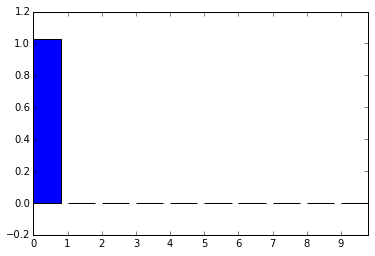

In [133]:
plt.xticks(x)
plt.bar(x, tt[0], color="blue")

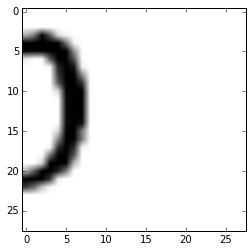

In [134]:
blok_center = (46, 45)
blok_loc = (blok_center[0]-blok_size[0]/2, blok_center[1]-blok_size[1]/2)

imgB = img[blok_loc[0]:blok_loc[0]+blok_size[0], 
           blok_loc[1]:blok_loc[1]+blok_size[1], 0]

plt.imshow(imgB, cmap="Greys")

1/1 [==============================] - 0s


<Container object of 10 artists>

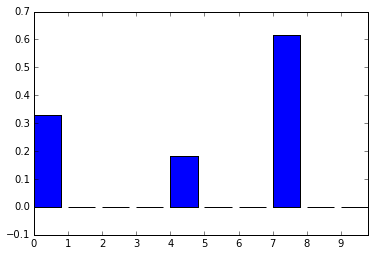

In [135]:
imgB_test = imgB.reshape(784)
imgB_test = imgB_test/255.
tt = model.predict(np.array([imgB_test]), verbose=1)
plt.xticks(x)
plt.bar(x, tt[0], color="blue")